In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers,optimizers
from keras.models import Sequential,load_model
from keras.layers import LSTM, Dense,Dropout,Activation
from node2vec import Node2Vec
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
#from graph2vec import graph2vec
import pickle

In [21]:
import networkx as nx

In [22]:
data = pd.read_csv('data.csv',header=0,usecols=['V1','V2','epochTime'])

In [23]:
print(data.info())
Dict={}#Dictionary to hold graphs based on timestamp
Models = {}#dictionary which contains model based on timestamp. model can be used to get features for each node

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28244 entries, 0 to 28243
Data columns (total 3 columns):
V1           28244 non-null int64
V2           28244 non-null int64
epochTime    28244 non-null int64
dtypes: int64(3)
memory usage: 662.1 KB
None


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28244 entries, 0 to 28243
Data columns (total 3 columns):
V1           28244 non-null int64
V2           28244 non-null int64
epochTime    28244 non-null int64
dtypes: int64(3)
memory usage: 662.1 KB
None


In [25]:
print(data.head())

   V1  V2  epochTime
0   1   2      21574
1   1   3      21578
2   1   4      21687
3   1   5      21574
4   1   6      21796


In [26]:
print(data.describe())

                 V1            V2      epochTime
count  28244.000000  28244.000000   28244.000000
mean      23.250602     31.936411  127133.897748
std       16.894767     34.492383   75024.084317
min        1.000000      1.000000   20733.000000
25%       10.000000     12.000000   77611.000000
50%       20.000000     23.000000  108205.000000
75%       35.000000     42.000000  180535.750000
max       77.000000    274.000000  364094.000000


In [27]:
G = nx.Graph()

In [28]:
uniqueTimes = data['epochTime'].unique()

In [29]:
print(uniqueTimes)

[ 21574  21578  21687 ... 362458 362800 364094]


In [30]:
print(np.amax(uniqueTimes,axis=0))

364094


In [31]:
print(uniqueTimes.size)

15662


In [32]:
#for column in data[['V1','V2']]:
#constructing graphs at each timestamp
for index, row in data.iterrows():
    if Dict.get(row['epochTime']) is None:
        Dict[row['epochTime']] = nx.Graph()
        Dict[row['epochTime']].add_nodes_from([item for item in range(1, 275)])
        #print(Dict[row['epochTime']].number_of_nodes())
    Dict[row['epochTime']].add_edge(row['V1'],row['V2'])
prevkey = None
print(Dict[364094].number_of_edges())
print(Dict[364094].number_of_nodes())
print(Dict[21574].number_of_edges())
print(Dict[21574].number_of_nodes())
#adding previous timestamp graph's edges to the next graph
for key in sorted(Dict.keys()):
    if prevkey is not None:
        Dict[key].add_edges_from(Dict[prevkey].edges())
    prevkey = key
    #print( 'G_'+str(row['epochTime']))
    #print(row['V1'])
    

1
274
2
274


In [33]:
print(Dict[364094].number_of_edges())
print(Dict[364094].number_of_nodes())
print(Dict[21574].number_of_edges())
print(Dict[21574].number_of_nodes())

2124
274
80
274


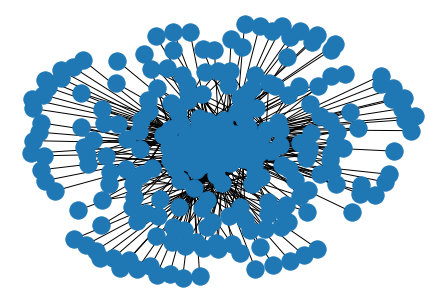

In [34]:
#nx.draw_circular(Dict[364094])
pos = nx.spring_layout(Dict[364094])
nx.draw(Dict[364094],pos=pos)

#nx.draw_spectral(Dict[364094])
plt.show()


In [35]:
print(sorted(Dict.keys()))

[20733, 20821, 20826, 20868, 20943, 20944, 20946, 21055, 21071, 21079, 21110, 21120, 21158, 21165, 21166, 21175, 21193, 21195, 21197, 21242, 21246, 21280, 21287, 21294, 21297, 21301, 21302, 21316, 21354, 21367, 21374, 21395, 21408, 21412, 21413, 21420, 21430, 21445, 21448, 21450, 21452, 21458, 21459, 21462, 21465, 21483, 21493, 21504, 21519, 21526, 21529, 21536, 21540, 21544, 21552, 21558, 21559, 21561, 21564, 21568, 21570, 21572, 21574, 21578, 21579, 21582, 21583, 21592, 21593, 21595, 21599, 21601, 21603, 21613, 21624, 21627, 21638, 21645, 21649, 21656, 21660, 21664, 21666, 21667, 21670, 21673, 21674, 21676, 21678, 21681, 21687, 21688, 21689, 21691, 21694, 21695, 21697, 21701, 21702, 21703, 21705, 21707, 21711, 21712, 21713, 21717, 21720, 21723, 21727, 21734, 21736, 21737, 21748, 21759, 21766, 21780, 21785, 21790, 21791, 21795, 21796, 21806, 21808, 21809, 21810, 21811, 21813, 21814, 21816, 21817, 21818, 21820, 21822, 21825, 21828, 21829, 21830, 21831, 21832, 21834, 21849, 21850, 21851

In [36]:
#print(nx.connected_components(Dict[364094]))
#precompute probabilities, generate walks and embed nodes\
# counter=0
# for key in sorted(Dict.keys()):
#     #print(key)
#     Models[key] = Node2Vec(Dict[key], dimensions=64, walk_length=30, num_walks=64, workers=1).fit(window=10, min_count=1, batch_words=4)
#     #print(Models[key].wv.get_vector('2'))
#     counter=counter+1
#     if counter == 3000:
        #break
#save_Models = open("Models.pickle","wb")
#pickle.dump(Models,save_Models)
#save_Models.close()
saved_Models = open("Models.pickle","rb")
Models = pickle.load(saved_Models)
saved_Models.close()
print(Models[21197].wv.get_vector(str(2)))

[-0.00772432  0.00632752 -0.0063993  -0.00512391  0.00602887 -0.00306697
 -0.0030915  -0.00042292 -0.0058469  -0.00327821  0.00370296 -0.00645732
  0.00681932  0.00542717 -0.00552979  0.00745168 -0.00450834  0.00525491
 -0.00072858  0.00123374  0.00039024  0.00491591  0.00493772 -0.00693729
 -0.00604424  0.00750965  0.00751123 -0.00058198 -0.00375347 -0.0003908
 -0.00310472 -0.00368951 -0.00234433  0.00585498 -0.00098379  0.00055402
 -0.00230983  0.00282037 -0.00536767 -0.00451026 -0.00255146  0.00745383
 -0.00212042  0.00454074 -0.00408302  0.00425594  0.00393322  0.0040973
  0.00757685  0.00145573  0.00357727  0.00070414 -0.00656309 -0.00356132
 -0.00357219 -0.00456994  0.0017245   0.00291742  0.00219621  0.00373749
  0.00666427 -0.00271177  0.00168733  0.00390551]


In [37]:
#nx.clustering(Dict[364094])
Models[21197].wv.get_vector(str(2))
#Models[21197].wv.most_similar('2')

array([-0.00772432,  0.00632752, -0.0063993 , -0.00512391,  0.00602887,
       -0.00306697, -0.0030915 , -0.00042292, -0.0058469 , -0.00327821,
        0.00370296, -0.00645732,  0.00681932,  0.00542717, -0.00552979,
        0.00745168, -0.00450834,  0.00525491, -0.00072858,  0.00123374,
        0.00039024,  0.00491591,  0.00493772, -0.00693729, -0.00604424,
        0.00750965,  0.00751123, -0.00058198, -0.00375347, -0.0003908 ,
       -0.00310472, -0.00368951, -0.00234433,  0.00585498, -0.00098379,
        0.00055402, -0.00230983,  0.00282037, -0.00536767, -0.00451026,
       -0.00255146,  0.00745383, -0.00212042,  0.00454074, -0.00408302,
        0.00425594,  0.00393322,  0.0040973 ,  0.00757685,  0.00145573,
        0.00357727,  0.00070414, -0.00656309, -0.00356132, -0.00357219,
       -0.00456994,  0.0017245 ,  0.00291742,  0.00219621,  0.00373749,
        0.00666427, -0.00271177,  0.00168733,  0.00390551], dtype=float32)

In [38]:
# x = np.zeros((8, 5,128))
# y = np.zeros((8, 5,128))
# data = train_data
# current_idx=0
# for i in range(8):
#     if current_idx + 5 >= 48:
#         # reset the index back to the start of the data set
#         current_idx = 0
#     x[i, :,:] =data[current_idx:current_idx + 5,:]
#     y[i, :,:] =data[current_idx + 1:current_idx + 5 + 1,:]
#     # convert all of temp_y into a one hot representation
#     #y[i, :, :] = to_categorical(temp_y, num_classes=self.vocabulary)
#     current_idx += 5
# print(x.shape)

NameError: name 'train_data' is not defined

In [39]:
class KerasBatchGenerator(object):

    def __init__(self, data, num_steps, batch_size, skip_step=2):
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.feature_size = 128
        # this will track the progress of the batches sequentially through the
        # data set - once the data reaches the end of the data set it will reset
        # back to zero
        self.current_idx = 0
        # skip_step is the number of words which will be skipped before the next
        # batch is skimmed from the data set
        self.skip_step = skip_step

    def generate(self):
        x = np.zeros((self.batch_size, self.num_steps,self.feature_size))
        y = np.zeros((self.batch_size, self.num_steps, self.feature_size))
        while True:
            for i in range(self.batch_size):
                if self.current_idx + self.num_steps >= len(self.data):
                    # reset the index back to the start of the data set
                    self.current_idx = 0
                x[i, :,:] = self.data[self.current_idx:self.current_idx + self.num_steps,:]
                y[i, :,:] = self.data[self.current_idx + 1:self.current_idx + self.num_steps + 1,:]
                # convert all of temp_y into a one hot representation
                #y[i, :, :] = to_categorical(temp_y, num_classes=self.vocabulary)
                self.current_idx += self.skip_step
            #print(x)
            yield x, y

In [40]:
adj = nx.adjacency_matrix(Dict[21687])
print(adj)


  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 7)	1
  (0, 8)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1
  (1, 7)	1
  (1, 11)	1
  (1, 14)	1
  (1, 18)	1
  (1, 24)	1
  (1, 26)	1
  (1, 55)	1
  (2, 0)	1
  (2, 1)	1
  (2, 4)	1
  (2, 7)	1
  (2, 8)	1
  :	:
  (54, 7)	1
  (54, 8)	1
  (54, 10)	1
  (54, 11)	1
  (54, 13)	1
  (54, 17)	1
  (54, 21)	1
  (54, 26)	1
  (54, 39)	1
  (54, 42)	1
  (54, 45)	1
  (54, 55)	1
  (55, 1)	1
  (55, 7)	1
  (55, 8)	1
  (55, 11)	1
  (55, 12)	1
  (55, 14)	1
  (55, 18)	1
  (55, 20)	1
  (55, 54)	1
  (60, 7)	1
  (60, 15)	1
  (60, 24)	1
  (60, 42)	1


In [41]:

# train_list = []
# node_features_list=[]
# for keys in sorted(Models.keys()):
#         node_features_list=[]
#         for nodes in range(1,3):
#             node_features_list.append(list(Models[keys].wv.get_vector(str(nodes))))
#         train_list.append(node_features_list)
# train_data =  np.array(train_list)   
# #train_data = np.array(node_features_list)
# print(train_data.shape)
# train_data = np.reshape(train_data,(100,128))
# print(train_data.shape)


(3000, 2, 64)


ValueError: cannot reshape array of size 384000 into shape (100,128)

In [42]:
print(train_data.shape)
print(len(Models.keys()))
#

#print(x.shape)

(3000, 2, 64)
3000


In [43]:
def load_data():
    # build the complete vocabulary, then convert text data to list of integers
    #word_to_id = build_vocab(train_path)
    train_list = []
    for keys in sorted(Models.keys()):
        node_features_list=[]
        for nodes in range(1,3):
            node_features_list.append(list(Models[keys].wv.get_vector(str(nodes))))
        train_list.append(node_features_list)
    A = np.array(train_list)
    #print(A.shape)
    #print(A[1:2,:])
    A1 = np.reshape(A,(3000,128))
    #print(train_data.shape)
    train_data = A1[0:2000,:]
    valid_data = A1[2000:3000,:]
    test_data = A1[2000:3000,:]
    test_data1 = A1[2001:3000,:]
    #vocabulary = len(word_to_id)
    #reversed_dictionary = dict(zip(word_to_id.values(), word_to_id.keys()))

    #print(train_data[:5])
    #print(word_to_id)
    #print(vocabulary)
    #print(" ".join([reversed_dictionary[x] for x in train_data[:10]]))
    return train_data, valid_data, test_data,test_data1,A1

In [44]:
train_data, valid_data, test_data,test_data1,A1 = load_data()
num_steps=5
batch_size=128
valid_batchsize = 1
test_batchsize = 1

train_data_generator = KerasBatchGenerator(train_data, num_steps, batch_size,
                                           skip_step=2)
valid_data_generator = KerasBatchGenerator(valid_data, num_steps, batch_size,
                                           skip_step=2)
test_data_generator = KerasBatchGenerator(test_data, num_steps, batch_size,
                                           skip_step=2)
print(train_data.shape
     )
print(len(train_data))
print(len(valid_data)//(batch_size*num_steps))
print(len(test_data))


(2000, 128)
2000
1
1000


In [45]:
hidden_size=128
num_epochs = 200
model = Sequential()
model.add(LSTM(hidden_size, return_sequences=True,input_shape=(num_steps,128 )))

model.add(LSTM(hidden_size, return_sequences=True))
model.add(layers.Dense(128,kernel_initializer='uniform',activation='tanh',use_bias=False))
model.add(layers.BatchNormalization())

model.add(Activation('tanh'))
#model.add(LSTM(128))
#if use_dropout:
#model.add(Dropout(0.5))
# model.compile(loss='mean_squared_error',
#              optimizer='adam',
#              metrics=['accuracy'])


#
#model.add(Activation('tanh'))
#model.add(Dropout(0.2))
#model.add(layers.Dense(128,kernel_initializer='uniform',activation = 'tanh'))
#model.add(layers.BatchNormalization())
#sgd = optimizers.SGD(lr=0.0001, decay=.00005, momentum=0.9, nesterov=True)
adam = optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999,epsilon=10e-08,amsgrad=True)
#optimizer = Adam()
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
print(model.summary())
model.fit_generator(train_data_generator.generate(), (len(train_data)//(batch_size*num_steps)), num_epochs,validation_data=valid_data_generator.generate(),
                        validation_steps=(len(valid_data)//(batch_size*num_steps)),callbacks=[checkpointer]
                        )


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 128)            131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 128)            131584    
_________________________________________________________________
dense_1 (Dense)              (None, 5, 128)            16384     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 128)            512       
_________________________________________________________________
activation_1 (Activation)    (None, 5, 128)            0         
Total params: 280,064
Trainable params: 279,808
Non-trainable params: 256
_________________________________________________________________
None
Epoch 1/200
3/3 [==============================] - ETA: 8s - loss: 0.3625 - accuracy: 0.01 - ETA: 2s - loss

3/3 [==============================] - ETA: 0s - loss: 0.1705 - accuracy: 0.05 - ETA: 0s - loss: 0.1570 - accuracy: 0.07 - 1s 200ms/step - loss: 0.1421 - accuracy: 0.0667 - val_loss: 0.0766 - val_accuracy: 0.0750

Epoch 00025: val_loss did not improve from 0.07546
Epoch 26/200
3/3 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.04 - ETA: 0s - loss: 0.1564 - accuracy: 0.07 - 1s 198ms/step - loss: 0.1674 - accuracy: 0.0729 - val_loss: 0.0908 - val_accuracy: 0.2906

Epoch 00026: val_loss did not improve from 0.07546
Epoch 27/200
3/3 [==============================] - ETA: 0s - loss: 0.1811 - accuracy: 0.10 - ETA: 0s - loss: 0.1766 - accuracy: 0.10 - 1s 193ms/step - loss: 0.1707 - accuracy: 0.1036 - val_loss: 0.0737 - val_accuracy: 0.3625

Epoch 00027: val_loss improved from 0.07546 to 0.07370, saving model to weights.hdf5
Epoch 28/200
3/3 [==============================] - ETA: 0s - loss: 0.1320 - accuracy: 0.05 - ETA: 0s - loss: 0.1251 - accuracy: 0.03 - 1s 226ms/

Epoch 00052: val_loss improved from 0.05371 to 0.05045, saving model to weights.hdf5
Epoch 53/200
3/3 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.15 - ETA: 0s - loss: 0.1197 - accuracy: 0.15 - 1s 239ms/step - loss: 0.1154 - accuracy: 0.1714 - val_loss: 0.0644 - val_accuracy: 0.2344

Epoch 00053: val_loss did not improve from 0.05045
Epoch 54/200
3/3 [==============================] - ETA: 0s - loss: 0.0891 - accuracy: 0.06 - ETA: 0s - loss: 0.0814 - accuracy: 0.07 - 1s 190ms/step - loss: 0.0988 - accuracy: 0.0573 - val_loss: 0.0548 - val_accuracy: 0.4688

Epoch 00054: val_loss did not improve from 0.05045
Epoch 55/200
3/3 [==============================] - ETA: 0s - loss: 0.1332 - accuracy: 0.22 - ETA: 0s - loss: 0.1262 - accuracy: 0.23 - 1s 197ms/step - loss: 0.1236 - accuracy: 0.2234 - val_loss: 0.0522 - val_accuracy: 0.2109

Epoch 00055: val_loss did not improve from 0.05045
Epoch 56/200
3/3 [==============================] - ETA: 0s - loss: 0.1098 - accu

3/3 [==============================] - ETA: 0s - loss: 0.0991 - accuracy: 0.26 - ETA: 0s - loss: 0.0933 - accuracy: 0.26 - 1s 186ms/step - loss: 0.0910 - accuracy: 0.2703 - val_loss: 0.0481 - val_accuracy: 0.4266

Epoch 00081: val_loss did not improve from 0.04400
Epoch 82/200
3/3 [==============================] - ETA: 0s - loss: 0.0794 - accuracy: 0.33 - ETA: 0s - loss: 0.0746 - accuracy: 0.28 - 1s 189ms/step - loss: 0.0702 - accuracy: 0.2609 - val_loss: 0.0478 - val_accuracy: 0.5094

Epoch 00082: val_loss did not improve from 0.04400
Epoch 83/200
3/3 [==============================] - ETA: 0s - loss: 0.0570 - accuracy: 0.23 - ETA: 0s - loss: 0.0822 - accuracy: 0.20 - 1s 203ms/step - loss: 0.0859 - accuracy: 0.2167 - val_loss: 0.0432 - val_accuracy: 0.3109

Epoch 00083: val_loss improved from 0.04400 to 0.04319, saving model to weights.hdf5
Epoch 84/200
3/3 [==============================] - ETA: 0s - loss: 0.0867 - accuracy: 0.32 - ETA: 0s - loss: 0.0850 - accuracy: 0.30 - 1s 224ms/

Epoch 00109: val_loss did not improve from 0.04180
Epoch 110/200
3/3 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.35 - ETA: 0s - loss: 0.0655 - accuracy: 0.33 - 1s 192ms/step - loss: 0.0629 - accuracy: 0.3432 - val_loss: 0.0424 - val_accuracy: 0.2656

Epoch 00110: val_loss did not improve from 0.04180
Epoch 111/200
3/3 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.10 - ETA: 0s - loss: 0.0482 - accuracy: 0.19 - 1s 185ms/step - loss: 0.0493 - accuracy: 0.2099 - val_loss: 0.0430 - val_accuracy: 0.2547

Epoch 00111: val_loss did not improve from 0.04180
Epoch 112/200
3/3 [==============================] - ETA: 0s - loss: 0.0669 - accuracy: 0.30 - ETA: 0s - loss: 0.0695 - accuracy: 0.32 - 1s 191ms/step - loss: 0.0674 - accuracy: 0.3182 - val_loss: 0.0436 - val_accuracy: 0.4437

Epoch 00112: val_loss did not improve from 0.04180
Epoch 113/200
3/3 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.34 - ETA: 0s - loss: 0


Epoch 00138: val_loss did not improve from 0.03872
Epoch 139/200
3/3 [==============================] - ETA: 0s - loss: 0.0499 - accuracy: 0.40 - ETA: 0s - loss: 0.0477 - accuracy: 0.41 - 1s 170ms/step - loss: 0.0443 - accuracy: 0.3328 - val_loss: 0.0384 - val_accuracy: 0.4328

Epoch 00139: val_loss improved from 0.03872 to 0.03842, saving model to weights.hdf5
Epoch 140/200
3/3 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.27 - ETA: 0s - loss: 0.0453 - accuracy: 0.23 - 0s 165ms/step - loss: 0.0535 - accuracy: 0.2901 - val_loss: 0.0472 - val_accuracy: 0.5938

Epoch 00140: val_loss did not improve from 0.03842
Epoch 141/200
3/3 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.34 - ETA: 0s - loss: 0.0539 - accuracy: 0.31 - 1s 168ms/step - loss: 0.0519 - accuracy: 0.3359 - val_loss: 0.0432 - val_accuracy: 0.3391

Epoch 00141: val_loss did not improve from 0.03842
Epoch 142/200
3/3 [==============================] - ETA: 0s - loss: 0.0437 -

Epoch 00167: val_loss did not improve from 0.03600
Epoch 168/200
3/3 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.35 - ETA: 0s - loss: 0.0389 - accuracy: 0.26 - 1s 209ms/step - loss: 0.0420 - accuracy: 0.2708 - val_loss: 0.0441 - val_accuracy: 0.3391

Epoch 00168: val_loss did not improve from 0.03600
Epoch 169/200
3/3 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.24 - ETA: 0s - loss: 0.0465 - accuracy: 0.25 - 1s 210ms/step - loss: 0.0466 - accuracy: 0.3036 - val_loss: 0.0417 - val_accuracy: 0.2234

Epoch 00169: val_loss did not improve from 0.03600
Epoch 170/200
3/3 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.30 - ETA: 0s - loss: 0.0404 - accuracy: 0.35 - 1s 262ms/step - loss: 0.0382 - accuracy: 0.3516 - val_loss: 0.0356 - val_accuracy: 0.3984

Epoch 00170: val_loss improved from 0.03600 to 0.03563, saving model to weights.hdf5
Epoch 171/200
3/3 [==============================] - ETA: 0s - loss: 0.0418 - 


Epoch 00196: val_loss did not improve from 0.02958
Epoch 197/200
3/3 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.27 - ETA: 0s - loss: 0.0435 - accuracy: 0.27 - 1s 204ms/step - loss: 0.0408 - accuracy: 0.1943 - val_loss: 0.0261 - val_accuracy: 0.2578

Epoch 00197: val_loss improved from 0.02958 to 0.02609, saving model to weights.hdf5
Epoch 198/200
3/3 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.33 - ETA: 0s - loss: 0.0424 - accuracy: 0.38 - 1s 205ms/step - loss: 0.0402 - accuracy: 0.3943 - val_loss: 0.0474 - val_accuracy: 0.0266

Epoch 00198: val_loss did not improve from 0.02609
Epoch 199/200
3/3 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.38 - ETA: 0s - loss: 0.0299 - accuracy: 0.35 - 1s 202ms/step - loss: 0.0327 - accuracy: 0.3391 - val_loss: 0.0439 - val_accuracy: 0.0344

Epoch 00199: val_loss did not improve from 0.02609
Epoch 200/200
3/3 [==============================] - ETA: 0s - loss: 0.0490 -

In [ ]:
#model.predict(test_data_generator.generate(),steps = len(test_data)//batch_size*num_steps,verbose=1)
model = load_model('weights.hdf5')
model.evaluate_generator(test_data_generator.generate(),steps = (len(test_data)//(batch_size*num_steps)),verbose=1)

In [ ]:
save_features = open("features.pickle","wb")
pickle.dump(A1,save_features)
save_features.close()

In [ ]:
saved_features = open("features.pickle","rb")
A2 = pickle.load(saved_features)
saved_features.close()

In [ ]:
print(A2.shape)

In [ ]:
#save_Models = open("Models.pickle","wb")
#pickle.dump(Models,save_Models)
#save_Models.close()
saved_Models = open("Models.pickle","rb")
Models2 = pickle.load(saved_Models)
saved_Models.close()
print(Models2[21197].wv.get_vector(str(2)))

In [ ]:
#model.predict(test_data,test_data1)

In [46]:
#model.add(LSTM(256,input_Shape=(1,1)))
dummy_iters = 10
example_training_generator = KerasBatchGenerator(train_data, num_steps, 1,
                                                     skip_step=1)
for i in range(dummy_iters):
    dummy = next(example_training_generator.generate())
num_predict = 10
#print(dummy[:,1,:])
prediction = None
actual = None
for i in range(num_predict):
    data = next(example_training_generator.generate())
    prediction = model.predict(data[0])
    actual = train_data[num_steps + dummy_iters + i,:]
    #predict_word = np.argmax(prediction[:, num_steps-1, :])
    print(prediction.shape)
print(prediction[:,1,:])
print(actual)
    #true_print_out += reversed_dictionary[train_data[num_steps + dummy_iters + i]] + " "
    #pred_print_out += reversed_dictionary[predict_word] + " "

(1, 5, 128)
(1, 5, 128)
(1, 5, 128)
(1, 5, 128)
(1, 5, 128)
(1, 5, 128)
(1, 5, 128)
(1, 5, 128)
(1, 5, 128)
(1, 5, 128)
[[-1.23136379e-01 -1.33326083e-01  2.37168700e-01  9.13959276e-03
   6.59638122e-02  9.00416821e-03 -1.38282388e-01 -1.01307742e-01
  -8.77596904e-03  1.62558947e-02 -2.25726143e-01 -1.97991401e-01
  -1.17519312e-01  1.47877736e-02  1.76516205e-01  1.49909437e-01
   1.67217627e-01  2.41899431e-01  1.88543171e-01 -1.53863057e-01
   2.34106183e-01 -6.78869942e-03  2.25609437e-01 -2.15864316e-01
   7.96658024e-02  2.38866121e-01 -2.02647358e-01  4.53060307e-02
  -2.75181860e-01 -2.35657945e-01  3.17375399e-02  1.16904512e-01
  -2.79101223e-01  2.51910031e-01 -4.57584932e-02 -7.27210417e-02
  -7.90179893e-02  5.08179292e-02 -1.90631505e-02  3.42492796e-02
   1.61627561e-01  1.12711780e-01  1.33369401e-01  2.32357889e-01
   7.89418042e-01 -6.22776002e-02  2.28030980e-01  1.12798633e-02
   2.71782696e-01 -1.97781011e-01  9.26864147e-02 -3.16232406e-02
   2.72544567e-02  1.3